# Linear Algebra in Python
## Massive Graph Management & Analytics: 1st Deliverable
### Jose Antonio Lorencio Abril & Mariana Mayorga Llano


Linear Algebra is very useful when analyzing graphs, because we can leverage the power of matrices to represent the graph and perform operations on it. In this notebook we show how to use python to perform the basic operations of linear algebra.

The numpy library will be very useful! We will also use matplotlib to visualize some of the results.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csgraph
import networkx as nx

### Vectors and Matrices

We can use numpy to define vectors and matrices and perform operations on them.

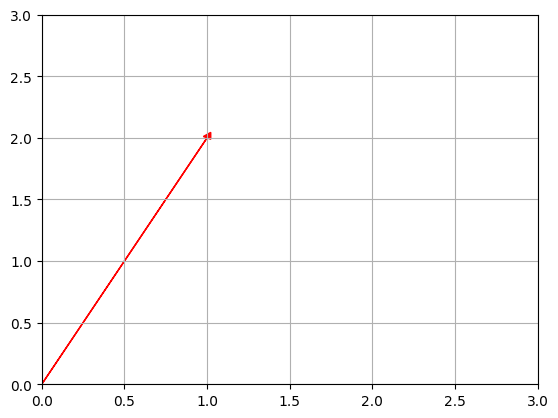

In [ ]:
vector = np.array([1, 2])

# show the vector as an arrow
plt.arrow(0, 0, vector[0], vector[1], head_width=.05, head_length=0.05, color='red')
plt.axis([0, 3, 0, 3])
plt.grid()
plt.show()

In [ ]:
matrix = np.array([[1, 2], [3, 1]])
print(matrix)

[[1 2]
 [3 1]]


And we can operate with them as we would do in linear algebra.

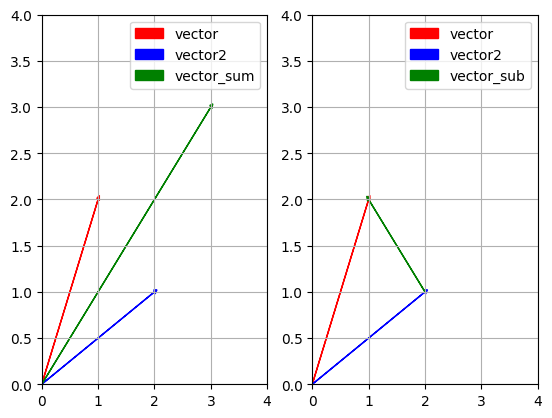

In [ ]:
vector2 = np.array([2, 1])

vector_sum = vector + vector2
vector_sub = vector - vector2

plt.subplot(1, 2, 1)
plt.arrow(0, 0, vector[0], vector[1], head_width=.05, head_length=0.05, color='red', label='vector')
plt.arrow(0, 0, vector2[0], vector2[1], head_width=.05, head_length=0.05, color='blue', label='vector2')
plt.arrow(0, 0, vector_sum[0], vector_sum[1], head_width=.05, head_length=0.05, color='green', label='vector_sum')
plt.axis([0, 4, 0, 4])
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.arrow(0, 0, vector[0], vector[1], head_width=.05, head_length=0.05, color='red', label='vector')
plt.arrow(0, 0, vector2[0], vector2[1], head_width=.05, head_length=0.05, color='blue', label='vector2')
plt.arrow(vector2[0], vector2[1], vector_sub[0], vector_sub[1], head_width=.05, head_length=0.05, color='green', label='vector_sub')
plt.axis([0, 4, 0, 4])
plt.grid()
plt.legend()

plt.show()

As well as matrix operations.

In [ ]:
transposed = matrix.T
print(transposed)

[[1 3]
 [2 1]]


In [ ]:
squared = matrix.dot(matrix)
print(squared)

#Or

squared = matrix @ matrix
print(squared)

[[7 4]
 [6 7]]
[[7 4]
 [6 7]]


In [ ]:
inverse = np.linalg.inv(matrix)
print(inverse)

[[-0.2  0.4]
 [ 0.6 -0.2]]


In [ ]:
check = matrix.dot(inverse) # or matrix @ inverse, should be identity matrix

print(check)

[[1. 0.]
 [0. 1.]]


Usually, when checking if two matrices are equal, we have to take into account that the result of the operations might not be exactly the same as the expected result due to the precision of the floating point numbers. Therefore, we have to check if the difference between the two matrices is smaller than a certain threshold.

In [ ]:
# To check if check is identity matrix
print(np.isclose(check, np.eye(2)))

[[ True  True]
 [ True  True]]


In [ ]:
# We can also define the precision
print(np.isclose(check, np.eye(2), atol=1e-8))

[[ True  True]
 [ True  True]]


Finally, let's do some vector-matrix operations.

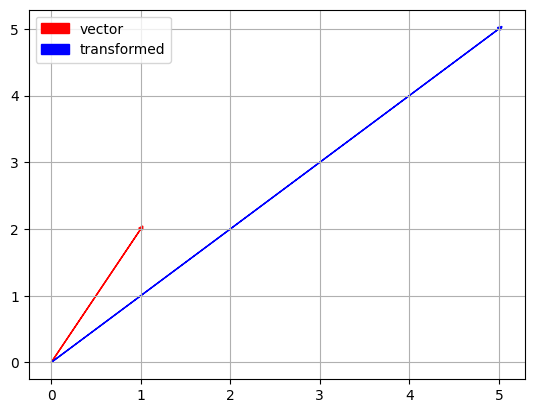

In [ ]:
transformed = matrix.dot(vector)

plt.arrow(0, 0, vector[0], vector[1], head_width=.05, head_length=0.05, color='red', label='vector')
plt.arrow(0, 0, transformed[0], transformed[1], head_width=.05, head_length=0.05, color='blue', label='transformed')
plt.grid()
plt.legend()
plt.show()

### Norms

The norm of a vector is a measure of its length. It must satisfy the following properties:

- $\|x\| \geq 0$ and $\|x\| = 0$ if and only if $x = 0$.
- $\|\alpha x\| = |\alpha|\|x\|$ for any scalar $\alpha$.
- $\|x + y\| \leq \|x\| + \|y\|$ (triangle inequality).

Let's see some examples:

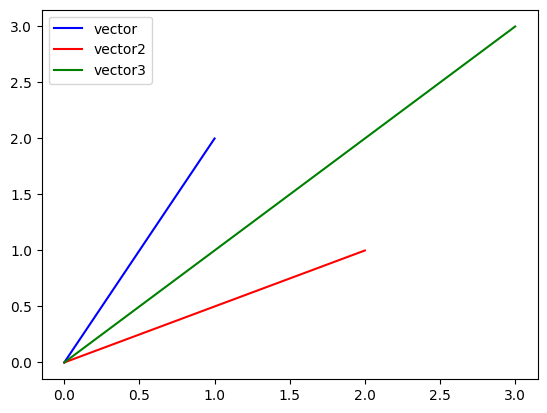

In [ ]:
vector = np.array([1, 2])
vector2 = np.array([2, 1])
vector3 = vector + vector2

plt.plot([0, vector[0]], [0, vector[1]], 'b', label='vector')
plt.plot([0, vector2[0]], [0, vector2[1]], 'r', label='vector2')
plt.plot([0, vector3[0]], [0, vector3[1]], 'g', label='vector3')
plt.legend()
plt.show()

In [ ]:
print("The norm of vector is: ", np.linalg.norm(vector))
print("The norm of vector2 is: ", np.linalg.norm(vector2))
print("The norm of vector3 is: ", np.linalg.norm(vector3))

print("Observe that the norm of vector3 is smaller than the sum of the norms of vector and vector2:")
print(str(np.linalg.norm(vector3)) + " < " + str(np.linalg.norm(vector) + np.linalg.norm(vector2)))

The norm of vector is:  2.23606797749979
The norm of vector2 is:  2.23606797749979
The norm of vector3 is:  4.242640687119285
Observe that the norm of vector3 is smaller than the sum of the norms of vector and vector2:
4.242640687119285 < 4.47213595499958


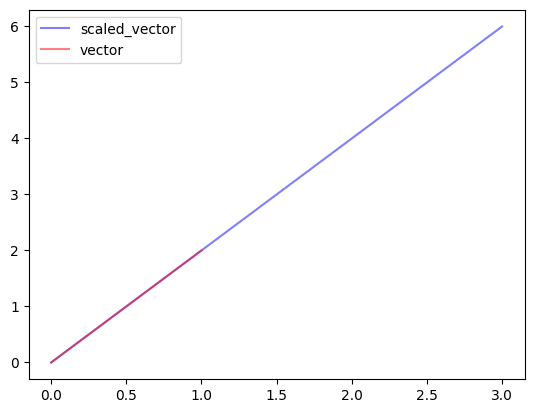

In [ ]:
scaled_vector = vector * 3

plt.plot([0, scaled_vector[0]], [0, scaled_vector[1]], 'b', label='scaled_vector', alpha=0.5)
plt.plot([0, vector[0]], [0, vector[1]], 'r', label='vector', alpha=0.5)
plt.legend()
plt.show()

In [ ]:
print("The norm of scaled_vector is: ", np.linalg.norm(scaled_vector))
print("The norm of vector is: ", np.linalg.norm(vector))

print("Observe that the norm of scaled_vector is 3 times the norm of vector:")
print(str(np.linalg.norm(scaled_vector)) + " = 3 * " + str(np.linalg.norm(vector)))

The norm of scaled_vector is:  6.708203932499369
The norm of vector is:  2.23606797749979
Observe that the norm of scaled_vector is 3 times the norm of vector:
6.708203932499369 = 3 * 2.23606797749979


#### p-norm

A widely used norm is the p-norm, defined as:

$$\|x\|_p = \left(\sum_{i=1}^n |x_i|^p\right)^{1/p}$$

For $p=2$ we have the Euclidean norm:

$$\|x\|_2 = \sqrt{\sum_{i=1}^n |x_i|^2}$$

This is the norm that we have computed so far. Let's compute some p-norms now:

In [ ]:
print("As we saw, the norm of vector is: ", np.linalg.norm(vector))
print("This is the same as the 2-norm of vector: ", np.linalg.norm(vector, 2))
print("We can compare it with the 1-norm of vector: ", np.linalg.norm(vector, 1))

As we saw, the norm of vector is:  2.23606797749979
This is the same as the 2-norm of vector:  2.23606797749979
We can compare it with the 1-norm of vector:  3.0


### Determinant

The determinant of a square matrix is a value that can be computed from the elements of the matrix. It is denoted as $det(A)$, $|A|$ or $detA$. It measures the hyper-volume of the parallelotope spanned by the columns of the matrix.

Some properties of the determinant are:
- $det(I) = 1$
- $det(A) = det(A^T)$
- $det(AB) = det(A)det(B)$
- $det(A^{-1}) = \frac{1}{det(A)}$
- $det(\alpha A) = \alpha^n det(A)$, where $A \in \mathbb{R}^{n \times n}$
- $det(A) = 0$ if and only if $A$ is singular (non-invertible)

We can check these properties with numpy:


In [ ]:
print("The determinant of the identity matrix is: ", np.linalg.det(np.eye(2)))
matrix = np.array([[1, 2], [3, 1]])
matrix2 = np.array([[1, 2], [1, 0]])
print("The determinant of the matrix is: ", np.linalg.det(matrix), " which is the same as the determinant of its transpose: ", np.linalg.det(matrix.T))
print("The determinant of the matrix2 is: ", np.linalg.det(matrix2))
print("The determinant of the product of matrix and matrix2 is: ", np.linalg.det(matrix.dot(matrix2)), " which is the same as the product of the determinants: ", np.linalg.det(matrix) * np.linalg.det(matrix2))
print("The determinant of the inverse of matrix is: ", np.linalg.det(np.linalg.inv(matrix)), " which is the same as the inverse of the determinant: ", 1 / np.linalg.det(matrix))
alpha = 0.5
scaled_matrix = alpha * matrix
print("The determinant of the scaled matrix is: ", np.linalg.det(scaled_matrix), " which is the same as the determinant scaled by alpha^2: ", alpha**2 * np.linalg.det(matrix))
non_invertible_matrix = np.array([[1, 2], [1, 2]])
print("The determinant of the non-invertible matrix is: ", np.linalg.det(non_invertible_matrix))

The determinant of the identity matrix is:  1.0
The determinant of the matrix is:  -5.000000000000001  which is the same as the determinant of its transpose:  -5.000000000000001
The determinant of the matrix2 is:  -2.0
The determinant of the product of matrix and matrix2 is:  10.000000000000002  which is the same as the product of the determinants:  10.000000000000002
The determinant of the inverse of matrix is:  -0.19999999999999998  which is the same as the inverse of the determinant:  -0.19999999999999996
The determinant of the scaled matrix is:  -1.25  which is the same as the determinant scaled by alpha^2:  -1.2500000000000002
The determinant of the non-invertible matrix is:  0.0


It's interesting to visualize the determinant as the area of the parallelogram spanned by the columns of the matrix. Let's see an example:

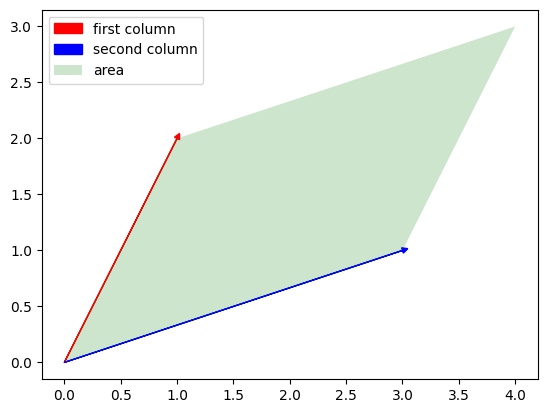

In [ ]:
plt.arrow(0, 0, matrix[0, 0], matrix[0, 1], head_width=.05, head_length=0.05, color='red', label='first column')
plt.arrow(0, 0, matrix[1, 0], matrix[1, 1], head_width=.05, head_length=0.05, color='blue', label='second column')
# The area
plt.fill([0, matrix[0, 0], matrix[0, 0] + matrix[1, 0], matrix[1, 0]], [0, matrix[0, 1], matrix[0, 1] + matrix[1, 1], matrix[1, 1]], 'g', alpha=0.2, label='area')
plt.legend(loc='upper left')
plt.show()

### Eigenvalues and Eigenvectors

An eigenvector of a square matrix $A$ is a non-zero vector $v$ such that multiplication by $A$ alters only the scale of $v$:

$$Av = \lambda v$$

where $\lambda$ is a scalar value called eigenvalue.

For example, we saw that the matrix $A = \begin{bmatrix} 2 & 1 \\ 1 & 2 \end{bmatrix}$ has two eigenvectors: $v_1 = \begin{bmatrix} t \\ t \end{bmatrix}$ and $v_2 = \begin{bmatrix} t \\ -t \end{bmatrix}$, with corresponding eigenvalues $\lambda_1 = 3$ and $\lambda_2 = 1$.

We can use numpy to compute the eigenvalues and eigenvectors of a matrix:

In [ ]:
A = np.array([[1, 2], [2, 1]])
eigvals, eigvecs = np.linalg.eig(A)
print("The eigenvalues of the matrix are: ", eigvals)
print("The eigenvectors of the matrix are: ", eigvecs)

check = A.dot(eigvecs[:, 0])
print("The action of the matrix on the first eigenvector is: ", check, " which is the same as the first eigenvalue times the first eigenvector: ", eigvals[0] * eigvecs[:, 0])
check = A.dot(eigvecs[:, 1])
print("The action of the matrix on the second eigenvector is: ", check, " which is the same as the second eigenvalue times the second eigenvector: ", eigvals[1] * eigvecs[:, 1])

The eigenvalues of the matrix are:  [ 3. -1.]
The eigenvectors of the matrix are:  [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
The action of the matrix on the first eigenvector is:  [2.12132034 2.12132034]  which is the same as the first eigenvalue times the first eigenvector:  [2.12132034 2.12132034]
The action of the matrix on the second eigenvector is:  [ 0.70710678 -0.70710678]  which is the same as the second eigenvalue times the second eigenvector:  [ 0.70710678 -0.70710678]


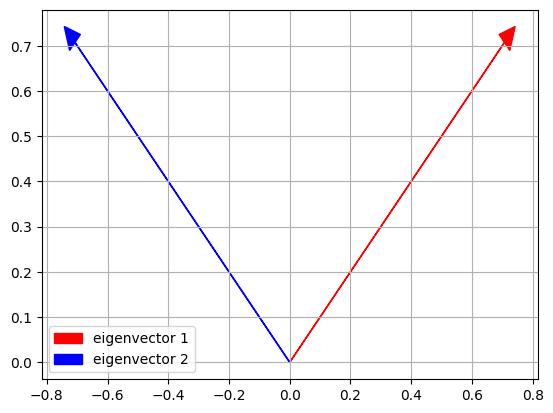

In [ ]:
plt.arrow(0, 0, eigvecs[0, 0], eigvecs[1, 0], head_width=.05, head_length=0.05, color='red', label='eigenvector 1')
plt.arrow(0, 0, eigvecs[0, 1], eigvecs[1, 1], head_width=.05, head_length=0.05, color='blue', label='eigenvector 2')
plt.grid()
plt.legend()

The **algebraic multiplicity** of an eigenvalue $\lambda$ is the number of times it appears as a root of the characteristic polynomial of the matrix $A$. The **geometric multiplicity** of an eigenvalue $\lambda$ is the dimension of the eigenspace corresponding to $\lambda$, which is the null space of the matrix $A - \lambda I$.

These are related to the following proposition:

> If all the eigenvalues of $A$ are distinct, then $A$ all the eigenvectors of $A$ are linearly independent.

In addition, it holds that the algebraic multiplicity of an eigenvalue is greater than or equal to its geometric multiplicity.

In the previous example, the eigenvalue $\lambda_1 = 3$ has algebraic multiplicity 1 and geometric multiplicity 1, while the eigenvalue $\lambda_2 = 1$ has algebraic multiplicity 1 and geometric multiplicity 2.

We can use numpy to compute the algebraic and geometric multiplicity of the eigenvalues of a matrix:

In [ ]:
def compute_multiplicities(A):
    multiplicities = {}
    for val in set(eigvals):
        # Algebraic Multiplicity
        alg_multiplicity = list(eigvals).count(val)

        # Geometric Multiplicity
        # By using the rank-nullity theorem
        geometric_multiplicity = A.shape[0] - np.linalg.matrix_rank(A - val*np.eye(A.shape[0]))

        multiplicities[val] = {"algebraic": alg_multiplicity, "geometric": geometric_multiplicity}
    return multiplicities

print("The algebraic and geometric multiplicities of the eigenvalues are: ", compute_multiplicities(A))

The algebraic and geometric multiplicities of the eigenvalues are:  {-0.9999999999999996: {'algebraic': 1, 'geometric': 1}, 3.0000000000000004: {'algebraic': 1, 'geometric': 1}}


#### Examples from the lectures
We can now easily compute the eigenvalues and eigenvectors of the matrices from the lectures:

$ A = \begin{bmatrix} -1 & 1 & 0 \\ -4 & 3 & 0 \\ 1 & 0 & 2 \end{bmatrix} $

In [ ]:
A = np.array([[-1, 1, 0], [-4, 3, 0], [1, 0, 2]])

eigvals, eigvecs = np.linalg.eig(A)
multiplicities = compute_multiplicities(A)

done = []
for i in range(len(eigvals)):
    if round(eigvals[i],2) not in done:
        done.append(round(eigvals[i],2))
        print("Eigenvalue: ", round(eigvals[i],2), " has algebraic multiplicity: ", multiplicities[eigvals[i]]["algebraic"], " and geometric multiplicity: ", multiplicities[eigvals[i]]["geometric"])
        print("\tThe eigenspace is: ")
        for j in range(multiplicities[eigvals[i]]["geometric"]):
            print("\t\t", eigvecs[:, i+j])

Eigenvalue:  2.0  has algebraic multiplicity:  1  and geometric multiplicity:  1
	The eigenspace is: 
		 [0. 0. 1.]
Eigenvalue:  1.0  has algebraic multiplicity:  2  and geometric multiplicity:  1
	The eigenspace is: 
		 [ 0.40824829  0.81649658 -0.40824829]


$B = \begin{bmatrix} 4 & 6 & 0 \\ -3 & -5 & 0 \\ -3 & -6 & 1 \end{bmatrix}$

In [ ]:
B = np.array([[4, 6, 0], [-3, -5, 0], [-3, -6, 1]])

eigvals, eigvecs = np.linalg.eig(B)
multiplicities = compute_multiplicities(B)

done = []
for i in range(len(eigvals)):
    if round(eigvals[i],2) not in done:
        done.append(round(eigvals[i],2))
        print("Eigenvalue: ", round(eigvals[i],2), " has algebraic multiplicity: ", multiplicities[eigvals[i]]["algebraic"], " and geometric multiplicity: ", multiplicities[eigvals[i]]["geometric"])
        print("\tThe eigenspace is: ")
        for j in range(multiplicities[eigvals[i]]["geometric"]):
            print("\t\t", eigvecs[:, i+j])

Eigenvalue:  1.0  has algebraic multiplicity:  2  and geometric multiplicity:  2
	The eigenspace is: 
		 [0. 0. 1.]
		 [ 0.57735027 -0.57735027 -0.57735027]
Eigenvalue:  -2.0  has algebraic multiplicity:  1  and geometric multiplicity:  1
	The eigenspace is: 
		 [ 0.57735027 -0.57735027 -0.57735027]


$C = \begin{bmatrix} 1 & -1 & 0 \\ -1 & 2 & 1 \\ 0 & 1 & 1 \end{bmatrix}$

In [ ]:
C = np.array([[1, -1, 0], [-1, 2, 1], [0, 1, 1]])

eigvals, eigvecs = np.linalg.eig(C)
multiplicities = compute_multiplicities(C)

done = []
for i in range(len(eigvals)):
    if round(eigvals[i],2) not in done:
        done.append(round(eigvals[i],2))
        print("Eigenvalue: ", round(eigvals[i],2), " has algebraic multiplicity: ", multiplicities[eigvals[i]]["algebraic"], " and geometric multiplicity: ", multiplicities[eigvals[i]]["geometric"])
        print("\tThe eigenspace is: ")
        for j in range(multiplicities[eigvals[i]]["geometric"]):
            print("\t\t", eigvecs[:, i+j])

Eigenvalue:  3.0  has algebraic multiplicity:  1  and geometric multiplicity:  1
	The eigenspace is: 
		 [-0.40824829  0.81649658  0.40824829]
Eigenvalue:  1.0  has algebraic multiplicity:  1  and geometric multiplicity:  1
	The eigenspace is: 
		 [-7.07106781e-01  2.61239546e-16 -7.07106781e-01]
Eigenvalue:  -0.0  has algebraic multiplicity:  1  and geometric multiplicity:  1
	The eigenspace is: 
		 [-0.57735027 -0.57735027  0.57735027]


$D = \begin{bmatrix} 1 & -1 & 4 \\ 3 & 2 & -1 \\ 2 & 1 & -1 \end{bmatrix}$

In [ ]:
D = np.array([[1, -1, 4], [3, 2, -1], [2, 1, -1]])

eigvals, eigvecs = np.linalg.eig(D)
multiplicities = compute_multiplicities(D)

done = []
for i in range(len(eigvals)):
    if round(eigvals[i],2) not in done:
        done.append(round(eigvals[i],2))
        print("Eigenvalue: ", round(eigvals[i],2), " has algebraic multiplicity: ", multiplicities[eigvals[i]]["algebraic"], " and geometric multiplicity: ", multiplicities[eigvals[i]]["geometric"])
        print("\tThe eigenspace is: ")
        for j in range(multiplicities[eigvals[i]]["geometric"]):
            print("\t\t", eigvecs[:, i+j])

Eigenvalue:  3.0  has algebraic multiplicity:  1  and geometric multiplicity:  1
	The eigenspace is: 
		 [0.40824829 0.81649658 0.40824829]
Eigenvalue:  -2.0  has algebraic multiplicity:  1  and geometric multiplicity:  1
	The eigenspace is: 
		 [ 0.57735027 -0.57735027 -0.57735027]
Eigenvalue:  1.0  has algebraic multiplicity:  1  and geometric multiplicity:  1
	The eigenspace is: 
		 [ 0.23570226 -0.94280904 -0.23570226]


$E = \begin{bmatrix} 6 & -2 & 2 \\ -2 & 3 & -1 \\ 2 & -1 & 3 \end{bmatrix}$

In [ ]:
E = np.array([[6, -2, 2], [-2, 3, -1], [2, -1, 3]])

eigvals, eigvecs = np.linalg.eig(E)
multiplicities = compute_multiplicities(E)

done = []
for i in range(len(eigvals)):
    if round(eigvals[i],2) not in done:
        done.append(round(eigvals[i],2))
        print("Eigenvalue: ", round(eigvals[i],2), " has algebraic multiplicity: ", multiplicities[eigvals[i]]["algebraic"], " and geometric multiplicity: ", multiplicities[eigvals[i]]["geometric"])
        print("\tThe eigenspace is: ")
        for j in range(multiplicities[eigvals[i]]["geometric"]):
            print("\t\t", eigvecs[:, i+j])

Eigenvalue:  8.0  has algebraic multiplicity:  1  and geometric multiplicity:  1
	The eigenspace is: 
		 [ 0.81649658 -0.40824829  0.40824829]
Eigenvalue:  2.0  has algebraic multiplicity:  1  and geometric multiplicity:  2
	The eigenspace is: 
		 [-0.57735027 -0.57735027  0.57735027]
		 [-0.11547005  0.57735027  0.80829038]


$F = \begin{bmatrix} 0 & -1 & -1 \\ 1 & 2 & 1 \\ 1 & 1 & 2 \end{bmatrix}$

In [ ]:
F = np.array([[0, -1, -1], [1, 2, 1], [1, 1, 2]])

eigvals, eigvecs = np.linalg.eig(F)
multiplicities = compute_multiplicities(F)

done = []
for i in range(len(eigvals)):
    if round(eigvals[i],2) not in done:
        done.append(round(eigvals[i],2))
        print("Eigenvalue: ", round(eigvals[i],2), " has algebraic multiplicity: ", multiplicities[eigvals[i]]["algebraic"], " and geometric multiplicity: ", multiplicities[eigvals[i]]["geometric"])
        print("\tThe eigenspace is: ")
        for j in range(multiplicities[eigvals[i]]["geometric"]):
            print("\t\t", eigvecs[:, i+j])

Eigenvalue:  1.0  has algebraic multiplicity:  1  and geometric multiplicity:  2
	The eigenspace is: 
		 [-0.81649658  0.40824829  0.40824829]
		 [-0.57735027  0.57735027  0.57735027]
Eigenvalue:  2.0  has algebraic multiplicity:  1  and geometric multiplicity:  1
	The eigenspace is: 
		 [-0.57735027  0.57735027  0.57735027]


**Exercise**
Finding the eigenvalues and unit eigenvectors of AᵀA and AAᵀ with A as the Fibonnaci matrix.

$A = \begin{bmatrix} 1 & 1 \\ 0 & 1 \end{bmatrix}$

In [ ]:
A = np.array([[1,1], [1,0]])
A

array([[1, 1],
       [1, 0]])

Since A is symmetric, AᵀA = AAᵀ=

$A^2 = \begin{bmatrix} 2 & 1 \\ 1 & 1 \end{bmatrix}$

In [ ]:
A2_3 = np.dot(A.T, A)
A2_3

array([[2, 1],
       [1, 1]])

In [ ]:
A2_2 = np.dot(A, A.T)
A2_2

array([[2, 1],
       [1, 1]])

In [ ]:
A2_1 = np.dot(A, A)
A2_1

array([[2, 1],
       [1, 1]])

In [ ]:
eigvals, eigvecs = np.linalg.eig(A2_1)
multiplicities = compute_multiplicities(A2_1)

done = []
for i in range(len(eigvals)):
    if round(eigvals[i],2) not in done:
        done.append(round(eigvals[i],2))
        print("Eigenvalue: ", round(eigvals[i],2), " has algebraic multiplicity: ", multiplicities[eigvals[i]]["algebraic"], " and geometric multiplicity: ", multiplicities[eigvals[i]]["geometric"])
        print("\tThe eigenspace is: ")
        for j in range(multiplicities[eigvals[i]]["geometric"]):
            print("\t\t", eigvecs[:, i+j])

Eigenvalue:  2.62  has algebraic multiplicity:  1  and geometric multiplicity:  1
	The eigenspace is: 
		 [0.85065081 0.52573111]
Eigenvalue:  0.38  has algebraic multiplicity:  1  and geometric multiplicity:  1
	The eigenspace is: 
		 [-0.52573111  0.85065081]


Since A is symmetric, $A^TA = AA^T= A^2 = \begin{bmatrix} 1 & 1 \\ 0 & 1 \end{bmatrix}$

### Diagonalization

We can represent the eigenvalues and eigenvectors of a matrix $A$ in the following way:

$$ A\cdot V = V\cdot \Lambda $$

where $V$ is a matrix whose columns are the eigenvectors of $A$, and $\Lambda$ is a diagonal matrix whose diagonal elements are the eigenvalues of $A$:

$$ \Lambda = \begin{bmatrix} \lambda_1 & 0 & \cdots & 0 \\ 0 & \lambda_2 & \cdots & 0 \\ \vdots & \vdots & \ddots & \vdots \\ 0 & 0 & \cdots & \lambda_n \end{bmatrix} $$

A matrix $A$ is diagonalizable if and only if it has $n$ linearly independent eigenvectors. In such case, $V$ is invertible and we can represent $A$ as:

$$ A = V\cdot \Lambda \cdot V^{-1}, $$

called the **eigendecomposition** of $A$.

**Exercise**
Show that $A^n = XΛX^{-1}$.



 This is only true if A is diagonalizable. If that is the case, then we can proceed by induction on $n$.


 For $n=2$:

 $$A^2 =  (  XΛX^{-1})^2= (XΛX^{-1})(XΛX^{-1}) = XΛ^2X^{-1}$$

Suppose it is true for n - 1:

$$A^{n-1} = XΛ^{n-1}X^{-1}$$

Then, for *n*, we have:

$$A^{n} =  AA^{n-1}=XΛX^{-1}XΛ^{n-1}X^{-1} = XΛ^{n}X^{-1}$$

In [ ]:
# Define a diagonalizable matrix A
A = np.array([[2, 1],
              [0, 3]])

# Perform eigendecomposition of A
eigenvalues, eigenvectors = np.linalg.eig(A)
X = eigenvectors
Lambda = np.diag(eigenvalues)
X_inv = np.linalg.inv(X)

# Define the exponent n
n = 2

# Calculate A^n directly
An_direct = np.linalg.matrix_power(A, n)

# Calculate XΛX⁻¹
XLambdaX_inv = np.dot(np.dot(X, Lambda**n), X_inv)

# Check if A^n is equal to XΛX⁻¹
if np.allclose(An_direct, XLambdaX_inv):
    print(f"A^{n} = XΛX⁻¹ for a diagonalizable matrix A:")
    print(f"A^{n}:")
    print(An_direct)
    print("XΛX⁻¹:")
    print(XLambdaX_inv)
else:
    print(f"A^{n} != XΛX⁻¹ for the given matrix A.")

# Now, demonstrate for n=10
n=10
# Calculate A^n directly
An_direct = np.linalg.matrix_power(A, n)

# Calculate XΛX⁻¹
XLambdaX_inv = np.dot(np.dot(X, Lambda**n), X_inv)

# Check if A^n is equal to XΛX⁻¹
if np.allclose(An_direct, XLambdaX_inv):
    print(f"A^{n} = XΛX⁻¹ for a diagonalizable matrix A:")
    print(f"A^{n}:")
    print(An_direct)
    print("XΛX⁻¹:")
    print(XLambdaX_inv)
else:
    print(f"A^{n} != XΛX⁻¹ for the given matrix A.")


A^2 = XΛX⁻¹ for a diagonalizable matrix A:
A^2:
[[4 5]
 [0 9]]
XΛX⁻¹:
[[4. 5.]
 [0. 9.]]
A^10 = XΛX⁻¹ for a diagonalizable matrix A:
A^10:
[[ 1024 58025]
 [    0 59049]]
XΛX⁻¹:
[[ 1024. 58025.]
 [    0. 59049.]]


### Orthogonal Matrices

A Matrix $U$ is orthogonal if it holds $U^T U = U U^T = I$.

> **Proposition:** The following statements are equivalent:
> - $U$ is orthogonal
> - $U^T$ is orthogonal
> - $U^{-1} = U^T$
> - $|U| = \pm 1$
> - The columns of $U$ form an orthonormal basis of $\mathbb{R}^n$

An interesting example is the rotation matrix:

$$ R = \begin{bmatrix} \cos \theta & -\sin \theta \\ \sin \theta & \cos \theta \end{bmatrix} $$

In [ ]:
theta = np.pi/4
rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])

print("The rotation matrix is: ")
print(rotation_matrix)
print()
print("R*R^T = R^T*R = ")
print(rotation_matrix.dot(rotation_matrix.T), " which is the identity matrix, so it is orthogonal")
print()
print("The determinant of the rotation matrix is: ", np.linalg.det(rotation_matrix))
print()
print("The inverse of the rotation matrix is: ")
print(np.linalg.inv(rotation_matrix), " which is the same as the transpose")
print
print("The eigenvalues of the rotation matrix are: ", np.linalg.eig(rotation_matrix)[0])
print()
print("The eigenvectors of the rotation matrix are: ", np.linalg.eig(rotation_matrix)[1], " which are orthonormal")

The rotation matrix is: 
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]

R*R^T = R^T*R = 
[[1.00000000e+00 1.01465364e-17]
 [1.01465364e-17 1.00000000e+00]]  which is the identity matrix, so it is orthogonal

The determinant of the rotation matrix is:  1.0

The inverse of the rotation matrix is: 
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]  which is the same as the transpose
The eigenvalues of the rotation matrix are:  [0.70710678+0.70710678j 0.70710678-0.70710678j]

The eigenvectors of the rotation matrix are:  [[0.70710678+0.j         0.70710678-0.j        ]
 [0.        -0.70710678j 0.        +0.70710678j]]  which are orthonormal


### Positive Semi-Definite Matrices

A matrix $A$ is positive semi-definite if there exists a matrix $B$ such that $A = B^T B$.

Note that if $A$ is positive semi-definite, then $A$ is symmetric, since $A^T = (B^T B)^T = B^T B = A$.

In addition, the following result holds:

> **Proposition:** Let $A$ be positive semi-definite. Then:
> - All the eigenvalues of $A$ are non-negative, $0\leq \lambda_1 \leq \lambda_2 \leq \cdots \leq \lambda_n$, and the eigenvectors corresponding to different eigenvalues are orthogonal.
> - The eigenvalues are real numbers.
> - The multiplicity of the eigenvalues is the dimension of the eigenspace.

In the case of positive semi-definite matrices, since all eigenvectors are orthogonal, we can store them in an orthogonal matrix, so we can write

$$A = U \Lambda U^T$$

where $U$ is an orthogonal matrix and $\Lambda$ is a diagonal matrix with the eigenvalues of $A$.

An alternative definition of positive semi-definite matrices is that $\forall x \in \mathbb{R}^n, x^T A x \geq 0$.

To determine if a matrix is positive semi-definite, there are several ways:

1. If the matrix is not symmetric, then it is not positive semi-definite.

2. If it's symmetric: Compute the eigenvalues of the matrix. If all the eigenvalues are non-negative, then the matrix is positive semi-definite.

3. If it's symmetric: Compute the minors of the matrix. If all the minors are non-negative, then the matrix is positive semi-definite.

Example:

$$ A = \begin{bmatrix} 1 & 2 \\ 2 & 5 \end{bmatrix} $$

In [ ]:
# Since it is symmetric, it can be positive semi-definite. Let's check it
A = np.array([[1, 2], [2, 5]])

# 1. Computing the eigenvalues
eigvals = np.linalg.eig(A)[0]
print("The eigenvalues of the matrix are: ", eigvals)
print("The eigenvalues are positive, so the matrix is positive semi-definite")

# 2. Computing the minors
minors = []
n = A.shape[0]

for i in range(n):
    minors.append(np.linalg.det(A[:i+1, :i+1]))

print("The minors of the matrix are: ", minors)
print("The minors are positive, so the matrix is positive semi-definite")

The eigenvalues of the matrix are:  [0.17157288 5.82842712]
The eigenvalues are positive, so the matrix is positive semi-definite
The minors of the matrix are:  [1.0, 1.0]
The minors are positive, so the matrix is positive semi-definite


$$ B = \begin{bmatrix} 1 & 2 \\ 1 & 4 \end{bmatrix} $$

In [ ]:
# Since the matrix is not symmetric, it cannot be positive semi-definite.

$$ C = \begin{bmatrix} 1 & 3 & 1\\ 3 & 5 & 2 \\ 1 & 2 & 4 \end{bmatrix} $$

In [ ]:
# Since it is symmetric, it can be positive semi-definite. Let's check it
C = np.array([[1, 3, 1], [3, 5, 2], [1, 2, 4]])

# 1. Computing the eigenvalues
eigvals = np.linalg.eig(C)[0]
print("The eigenvalues of the matrix are: ", eigvals)
print("There is one negative eigenvalue, so the matrix is not positive semi-definite")

# 2. Computing the minors
minors = []
n = C.shape[0]

for i in range(n):
    minors.append(np.linalg.det(C[:i+1, :i+1]))

print("The minors of the matrix are: ", minors)
print("There are negative minors, so the matrix is not positive semi-definite")

The eigenvalues of the matrix are:  [ 7.89004393 -0.60653475  2.71649082]
There is one negative eigenvalue, so the matrix is not positive semi-definite
The minors of the matrix are:  [1.0, -4.000000000000001, -13.000000000000005]
There are negative minors, so the matrix is not positive semi-definite


# Laplacian Matrix

The Laplacian matrix of a graph is defined as

***L = D - A***



> Where:
*   L is the Laplacian matrix.
*   D is the diagonal degree matrix, where *D[i][i]* represents the sum of edges connected to vertex i.
*   A is the adjacency matrix, where *A[i][j]* represents the edge between vertices i and j. If there is no edge, *A[i][j]* should be 0.

In the case of weighted graphs, the adjacency matrix A becomes a weighted adjacency matrix W, where *W[i][j]* represents the weight of the edge between vertices i and j.

In the *scipy.sparse.csgraph.laplacian* library function, we can implement laplacian with the function *csgraph.laplacian(G)*, where the input G is expected to be the weighted adjacency matrix of the graph. We will see examples for the approach of both directed and undirected graph.

The graph represented by the Laplacian matrix can be 1) directed or 2) undirected.



1.   Having an **undirected graph** will result in a *symmetric matrix*, since every incoming edge has a correspondant outgoing edge per pair of nodes.


In [ ]:
#EXAMPLE A: We can  give to the function an undirected weigthed graph (which implies a symmetric matrix)
G = np.arange(4) * np.arange(4)[:, np.newaxis]
print("Undirected graph matrix")
G


Undirected graph matrix


array([[0, 0, 0, 0],
       [0, 1, 2, 3],
       [0, 2, 4, 6],
       [0, 3, 6, 9]])

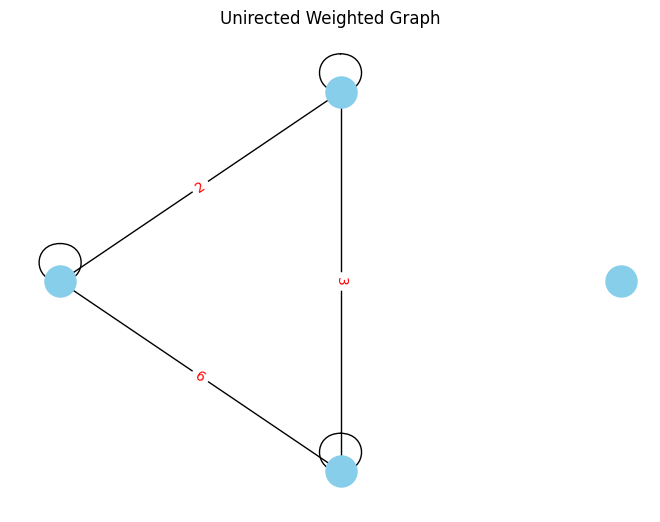

In [ ]:
# Create an undirected graph with weights
G_undirected_graph = nx.Graph()

# Add nodes
for i in range(G.shape[0]):
    G_undirected_graph.add_node(i)

# Add weighted edges
for i in range(G.shape[0]):
    for j in range(G.shape[1]):
        weight = G[i, j]
        if weight != 0:
            G_undirected_graph.add_edge(i, j, weight=weight)

# Visualize the directed weighted graph with circular layout
pos = nx.circular_layout(G_undirected_graph)
edge_labels = {(i, j): w['weight'] for i, j, w in G_undirected_graph.edges(data=True)}
nx.draw(G_undirected_graph, pos, node_size=500, node_color='skyblue', font_size=10, font_color='black')
nx.draw_networkx_edge_labels(G_undirected_graph, pos, edge_labels=edge_labels, font_color='red')
plt.title("Unirected Weighted Graph")
plt.show()

In [ ]:
#Giving as a result the following symmetric Laplacian matrix
undirected_laplacian = csgraph.laplacian(G)
print("Resulting Laplacian")
print(undirected_laplacian)

Resulting Laplacian
[[ 0  0  0  0]
 [ 0  5 -2 -3]
 [ 0 -2  8 -6]
 [ 0 -3 -6  9]]


2.   Having a **directed graph** will result in a *non-symmetric matrix*, since we would only be registering in the adjacency matrix either the incoming or outgoing edges, which means that the matrix will have different row and column sums.

In [ ]:
#EXAMPLE A: directed weigthed graph which implies a non-symmetric matrix. This can be visualizing on the difference in the rows and columns.
G = np.arange(9).reshape(3, 3)
print("Directed Matrix:")
print(G)

Directed Matrix:
[[0 1 2]
 [3 4 5]
 [6 7 8]]


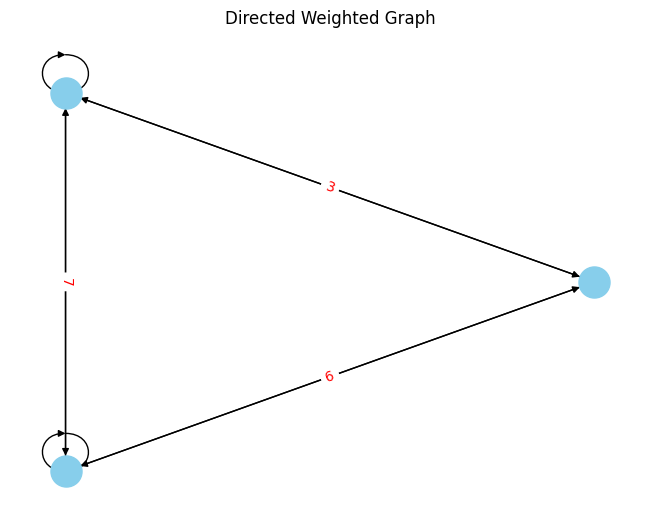

In [ ]:
# Create a directed graph with weights
G_graph = nx.DiGraph()

# Add nodes
for i in range(G.shape[0]):
    G_graph.add_node(i)

# Add weighted edges
for i in range(G.shape[0]):
    for j in range(G.shape[1]):
        weight = G[i, j]
        if weight != 0:
            G_graph.add_edge(i, j, weight=weight)

# Visualize the directed weighted graph with circular layout
pos = nx.circular_layout(G_graph)
edge_labels = {(i, j): w['weight'] for i, j, w in G_graph.edges(data=True)}
nx.draw(G_graph, pos, node_size=500, node_color='skyblue', font_size=10, font_color='black')
nx.draw_networkx_edge_labels(G_graph, pos, edge_labels=edge_labels, font_color='red')
plt.title("Directed Weighted Graph")
plt.show()

By using this approach of direct graphs, we will end up with two matrices from a same graph, which implies two varieties of the Laplacian matrix corresponding one to the in-degree and another one for the out-degree.

In [ ]:
#For directed graph, the default mode is using an in-degree.
print("Laplacian from Directed in-degree Matrix")
L_in_degree = csgraph.laplacian(G)
print(L_in_degree)

Laplacian from Directed in-degree Matrix
[[ 9 -1 -2]
 [-3  8 -5]
 [-6 -7  7]]


In [ ]:
#However, we can also adjust the function to consider the out-degree instead by setting the parameter use_out_degree=True
L_out_degree = csgraph.laplacian(G, use_out_degree=True)
print("Laplacian from Directed out-degree Matrix")
print(L_out_degree)

Laplacian from Directed out-degree Matrix
[[ 3 -1 -2]
 [-3  8 -5]
 [-6 -7 13]]


 Once we have this two variations, if we want to get the same result as the undirected graph Laplacian, we sum $$L = L(in-degree) + L(out-degree)^T$$ to get the undirected equivalency.

In [ ]:
#To get the equivalent of the Laplacian undirected graph from our two directed matrixes, we sum one with the transpose of teh other one
L_undirected = L_in_degree + L_out_degree.T
print("L = L(in-degree) + L(out-degree)^T =")
print(L_undirected)

L = L(in-degree) + L(out-degree)^T =
[[ 12  -4  -8]
 [ -4  16 -12]
 [ -8 -12  20]]


This can also be achieved with the following modifying the parameters of the *csgraph.laplacian()* function by:


1.   Setting symmetrized parameter to *True*




In [ ]:
L_undirected_2 = csgraph.laplacian(G, symmetrized=True)
print("Setting parameter symmetrized=True")
print(L_undirected_2)

Setting parameter symmetrized=True
[[ 12  -4  -8]
 [ -4  16 -12]
 [ -8 -12  20]]


2.   Add directly in the function *csgraph.laplacian()* the non-symetric matrix and its transposed (which would correspond to the oposite in/out-degree)


In [ ]:
L_undirected_3 = csgraph.laplacian(G + G.T)
print("Laplacian of non-symetric matrix + its transposed")
print(L_undirected_3)

Laplacian of non-symetric matrix + its transposed
[[ 12  -4  -8]
 [ -4  16 -12]
 [ -8 -12  20]]
